# Monkeypox Data Analysis 



# How it can transmit from one living organism to another?

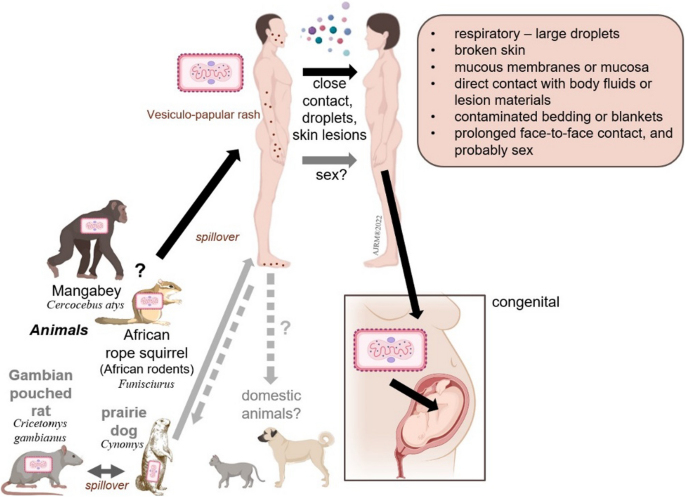)


In [1]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Load the drive helper and mount 
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive') # access to all files to Google MyDrive
# that is it Mounted at /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# How did the recent outbreak occur?

In [6]:
# insert libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import plotly_express as px # used for data visualization in data science, details: https://plotly.com/python/plotly-express/
# The plotly.express module contains functions that can create entire figures at once, and is referred to as Plotly Express or PX.
import squarify # need for plotting a basic treemap
from datetime import datetime

Ref: https://www.askpython.com/python/examples/plot-a-treemap-in-python

# Monkeypox **Project Data Analysis** with Modeling 

In [ ]:
#load the data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/monkey pox data analysis/monkeypox_df.csv')

In [ ]:
print('data frame shape',df.shape)
df.head(5)

data frame shape (62760, 36)


,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_death,Date_last_modified
0,N1,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-04-29,2022-05-06,...,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
1,N2,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-05-05,2022-05-12,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
2,N3,confirmed,London,London,England,GBR,NaN,NaN,2022-04-30,2022-05-13,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
3,N4,confirmed,London,London,England,GBR,NaN,Male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
4,N5,confirmed,London,London,England,GBR,NaN,Male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62760 entries, 0 to 62759
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       62716 non-null  object 
 1   Status                   62759 non-null  object 
 2   Location                 46824 non-null  object 
 3   City                     1331 non-null   object 
 4   Country                  62716 non-null  object 
 5   Country_ISO3             62716 non-null  object 
 6   Age                      2843 non-null   object 
 7   Gender                   2409 non-null   object 
 8   Date_onset               72 non-null     object 
 9   Date_confirmation        59000 non-null  object 
 10  Symptoms                 211 non-null    object 
 11  Hospitalised (Y/N/NA)    314 non-null    object 
 12  Date_hospitalisation     35 non-null     object 
 13  Isolated (Y/N/NA)        441 non-null    object 
 14  Date_isolation        

In [ ]:
df.Status.unique()

array(['confirmed', 'discarded', 'suspected', nan, 'omit_error',
       'https://www.publichealthontario.ca/-/media/Documents/M/2022/monkeypox-episummary.pdf?sc_lang=en'],
      dtype=object)

In [ ]:
# delete the row when the Status is nan
df=df.loc[~df.Status.isna()]
#'Status' change to category dtype
df['Status'] = df['Status'].astype("category")
# display the dataframe
# remove category value 'omit_error' from "Status" column
df['Status'] = df['Status'].cat.remove_categories('omit_error')
# Remobe the 'na' value from the 'Status'
df=df.loc[~df.Status.isna()] 
df.Status.unique()

['confirmed', 'discarded', 'suspected', 'https://www.publichealthontario.ca/-/media/Do...]
Categories (4, object): ['confirmed', 'discarded',
                         'https://www.publichealthontario.ca/-/media/Do..., 'suspected']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62440 entries, 0 to 62759
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       62397 non-null  object  
 1   Status                   62440 non-null  category
 2   Location                 46526 non-null  object  
 3   City                     1325 non-null   object  
 4   Country                  62397 non-null  object  
 5   Country_ISO3             62397 non-null  object  
 6   Age                      2839 non-null   object  
 7   Gender                   2383 non-null   object  
 8   Date_onset               72 non-null     object  
 9   Date_confirmation        58686 non-null  object  
 10  Symptoms                 211 non-null    object  
 11  Hospitalised (Y/N/NA)    314 non-null    object  
 12  Date_hospitalisation     35 non-null     object  
 13  Isolated (Y/N/NA)        440 non-null    object  
 14  Date_i

In [ ]:
df.Status.unique()

['confirmed', 'discarded', 'suspected', 'https://www.publichealthontario.ca/-/media/Do...]
Categories (4, object): ['confirmed', 'discarded',
                         'https://www.publichealthontario.ca/-/media/Do..., 'suspected']

Out of 35 features in the dataset, let's just take 1 main factors that I thought would be reason for Mpox disease in a person as "X" and the target column as "Y" which is nothing but Mpox is there or not. The features for "X" is Symptoms. The target feature is whether the person has MPox. 


# Detectionm of Monkeypox with Synmptoms Using Decesion Tree 

In [ ]:
# delete the row when the Status is nan
df=df.loc[~df.Symptoms.isna()]
#'Status' change to category dtype
df['Symptoms'] = df['Symptoms'].astype("category")
# display the dataframe
# remove category value 'omit_error' from "Status" column
#df['Symptoms'] = df['Symptoms'].cat.remove_categories('omit_error')
# Remobe the 'na' value from the 'Status'
df=df.loc[~df.Symptoms.isna()] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 54808
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       211 non-null    object  
 1   Status                   211 non-null    category
 2   Location                 154 non-null    object  
 3   City                     85 non-null     object  
 4   Country                  211 non-null    object  
 5   Country_ISO3             211 non-null    object  
 6   Age                      183 non-null    object  
 7   Gender                   187 non-null    object  
 8   Date_onset               49 non-null     object  
 9   Date_confirmation        186 non-null    object  
 10  Symptoms                 211 non-null    category
 11  Hospitalised (Y/N/NA)    81 non-null     object  
 12  Date_hospitalisation     24 non-null     object  
 13  Isolated (Y/N/NA)        94 non-null     object  
 14  Date_iso

In [ ]:
print('The total possible symptoms considered in the modeling is ',len(df.Symptoms.unique()))
df.Symptoms.unique()

The total possible symptoms considered in the modeling is  106


['rash', 'vesicular rash', 'skin lesions, ulcerative lesions', 'ulcerative lesions', 'oral and genital ulcers, fever', ..., 'fever, general malaise, joint pain, vesicular..., 'headache, fever, general malaise, sore throat..., 'severe sore throat, difficulty swallowing, sk..., 'papular and vesicular lesions', 'fever, chills, headache, muscle pain, swollen...]
Length: 106
Categories (106, object): ['Fatigue, headache, fever', 'Fatigue, sore throat, skin manifestations',
                           'Fever, chills, fatigue, headache, skin lesions', 'Fever, skin rashes', ...,
                           'swelling of lymph nodes, isolated skin lesions', 'symptoms compatible with monkeypox',
                           'ulcerative lesions', 'vesicular rash']

In [ ]:
# Create Status as features 
df.symptoms=pd.get_dummies(df['Symptoms'])

In [ ]:
# Create Symptoms as features 
df.symptoms=pd.get_dummies(df['Symptoms'])
X=pd.get_dummies(df['Symptoms'])
y=pd.get_dummies(df['Status'])
print(np.sum(y['confirmed']))
print(np.sum(y['discarded']))
print(np.sum(y['suspected']))
y=y['confirmed'] # confirmed is 1, not confirmed 0 in the target variables
print(X.shape)
print(y.shape)

186
24
1
(211, 106)
(211,)


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
51137    1
52810    1
54160    1
54807    1
54808    1
Name: confirmed, Length: 211, dtype: uint8

There are 211 people who have symptoms from the 62760 id. In addition, there are 186 confirmed Mpox patients and 25 non-Mpox disease patients.

In [ ]:
# Importing the required packages 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score, average_precision_score, precision_recall_curve, confusion_matrix


Next step is to split the dataset in to train and test sets.

# Detection of Mpox Disease using Decision Tree Classifier

# Method
The decision Tree classifier is one of the most popular and powerful classification algorithms in machine learning. We will use this classifier for the Detection of Mpox Disease. We use the concepts of Entropy/Information Gain and Gini Impurity to build the decision tree efficiently. This flowchart-like structure supports us in decision-making. Each data set feature becomes a root[parent] node, and the leaf[child] nodes represent the outcomes. The idea behind a decision tree is to divide the data set into smaller data sets based on descriptive features until we reach a small enough set that contains data points that fall under one label. Here we build decision trees using two approaches (Gini and Entropy).

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

# check the shape of X_train and X_test

X_train.shape, X_test.shape

((137, 106), (74, 106))

In [ ]:
n=min_samples_leaf_is=3

Let's create a decision tree classifier model and train using Gini as shown below:

In [ ]:
# perform training with giniIndex
# Creating the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=n)
# Fit the model 
clf_gini.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=100)

We now find the effect of restricting the maximum depth of the tree. We now try different depths and find the best value. 

accuracy for depth  1
89.1891891891892
accuracy for depth  2
89.1891891891892
accuracy for depth  3
89.1891891891892
accuracy for depth  4
89.1891891891892
accuracy for depth  5
89.1891891891892
accuracy for depth  6
89.1891891891892
accuracy for depth  7
89.1891891891892
accuracy for depth  8
89.1891891891892
accuracy for depth  9
89.1891891891892
accuracy for depth  10
89.1891891891892
accuracy for depth  11
89.1891891891892
accuracy for depth  12
89.1891891891892


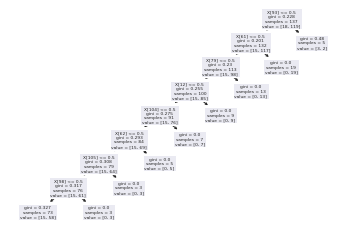

In [ ]:
# Testing accuracy using different maximum depth. 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

for i in range(1,13):
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=i, min_samples_leaf=n)
    # Fit the model 
    clf_gini.fit(X_train, y_train) 
    y_pred = clf_gini.predict(X_test)
    tree.plot_tree(clf_gini)
    print('accuracy for depth ',i)
    print(accuracy_score(y_test, y_pred)*100)

Since no impact on maximum depth so we use 1 as max_depth just. 

In [ ]:
# perform training with giniIndex
# Creating the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=1, min_samples_leaf=n)
# Fit the model 
clf_gini.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, random_state=100)

Let's create a decision tree classifier model and train using Entropy as shown below:

In [ ]:
# perform training with entropy
# Decision tree with entropy 
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = n)
# Fit the model  
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       random_state=100)

We now find the effect of restricting the maximum depth of the tree. We now try different depths and find the best value.

accuracy for depth  1
89.1891891891892
accuracy for depth  2
89.1891891891892
accuracy for depth  3
89.1891891891892
accuracy for depth  4
89.1891891891892
accuracy for depth  5
89.1891891891892
accuracy for depth  6
89.1891891891892
accuracy for depth  7
89.1891891891892
accuracy for depth  8
89.1891891891892
accuracy for depth  9
89.1891891891892
accuracy for depth  10
89.1891891891892
accuracy for depth  11
89.1891891891892
accuracy for depth  12
89.1891891891892


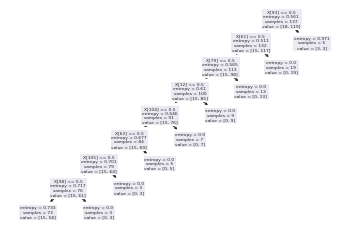

In [ ]:
# Testing accuracy using different maximum depth. 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

for i in range(1,13):
    #dt = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = i, min_samples_leaf =n)
    # Fit the model  
    clf_entropy.fit(X_train, y_train)
    #dt.fit(X_train, Y_train)
    y_pred = clf_entropy.predict(X_test)
    tree.plot_tree(clf_entropy)
    print('accuracy for depth ',i)
    print(accuracy_score(y_test, y_pred)*100)

Since no impact on maximum depth so we use 1 as max_depth just.

In [ ]:
# perform training with entropy
# Decision tree with entropy 
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 1, min_samples_leaf =n)
# Fit the model  
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       random_state=100)

Since, we are going to build decision trees using 2 different approaches (Gini and Entropy), let's write a function that will take the respective models and X_test as input and return the predicted values for each approach. The function code is shown below:

In [ ]:
# Function to make predictions 
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred  

Similarly, let's write another function to calculate the accuracy of both the models.

In [ ]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred):
  print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 

Now, let's execute the above 2 functions to get the predicted values and accuracy of each model as shown below:

In [ ]:
# Operational Phase 
print("Results Using Gini Index:")
# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

print("Results Using Entropy:")
# Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy) 

Results Using Gini Index:
Predicted values:
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy :  89.1891891891892
Results Using Entropy:
Predicted values:
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy :  89.1891891891892


We can see that both the models have similar accuracy 90.625%. Sometimes it might be different too.

Now let's try to print the tree created by both both the models and see which is the root node, which is nothing but the feature that has most impact on heart disease. Again, we will write a function that take the model as input as shown below:

In [ ]:
df.Symptoms.unique() 

['rash', 'vesicular rash', 'skin lesions, ulcerative lesions', 'ulcerative lesions', 'oral and genital ulcers, fever', ..., 'fever, general malaise, joint pain, vesicular..., 'headache, fever, general malaise, sore throat..., 'severe sore throat, difficulty swallowing, sk..., 'papular and vesicular lesions', 'fever, chills, headache, muscle pain, swollen...]
Length: 106
Categories (106, object): ['Fatigue, headache, fever', 'Fatigue, sore throat, skin manifestations',
                           'Fever, chills, fatigue, headache, skin lesions', 'Fever, skin rashes', ...,
                           'swelling of lymph nodes, isolated skin lesions', 'symptoms compatible with monkeypox',
                           'ulcerative lesions', 'vesicular rash']

In [ ]:
#Print tree
def printTree(classifier):
    feature_names = df.Symptoms.unique() 
    target_names = ['Mpox-Yes', 'Mpox-No']
    
    #Build the tree
    dot_data = tree.export_graphviz(classifier,                                      
                         out_file=None,feature_names=feature_names,
                         class_names=target_names, filled = True)
    
    #Draw tree
    tr = graphviz.Source(dot_data, format ="png")
    return tr

Let's print the tree generated by Gini model by using the printTree() function.

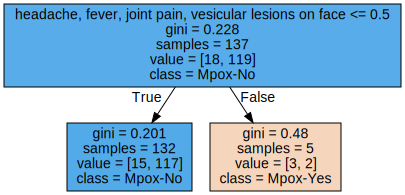

In [ ]:
#Print Gini tree
tr_gini = printTree(clf_gini)
tr_gini

Let's print the tree generated by Entropy model by using the printTree() function.

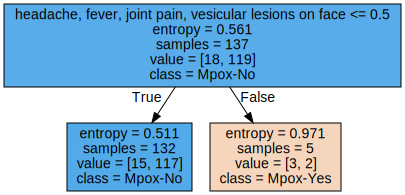

In [ ]:
#Print entropy tree
tr_entropy = printTree(clf_entropy)
tr_entropy

# Conclusion: When test size is 30%

# Case 1: min_samples_leaf=n=1,2 

We can see from the above predictions of both decision tree classifier models that  ``Vesicles''  is the root node, indicating that  ``Vesicles'' is the main factor influencing Mpox disease in a patient from the 106 class of symptoms. Accuracy 90.54%

# Case 2: min_samples_leaf=n=3,4, 5
We can see from the above predictions of both decision tree classifier models that  ``headache, fever, joint pain, vesicular lesions on face''  is the root node, indicating that  ``headache, fever, joint pain, vesicular lesions on face'' is the main factor influencing Mpox disease in a patient from the 106 class of symptoms. The predictions change based on the data, as does the train test split percentage, as well as the bias and variance in the data. We can divide the dataset into many small datasets to improve accuracy, create models, and then consolidate the results to achieve maximum accuracy.
test accuarcy =89.19% 
Note n=3,4,5 gives same decesion tree better than 5 leafs. 

# Case 3: min_samples_leaf=n=6, 19

When the numberr of leafs are 6,7,8,..19, then waekest symptom of Mpox is the ``mild symptoms'' and accuracy $90.54%$. That means if patient has ``mild symptoms'' then no chance of Mpox even if the patient has other symptom.  

# Case 4: min_samples_leaf=n>20

When the numberr of leaf is greater than 19, then there is no root node to study by the decesion tree algorithm. 


# Conclusion: When test size is 35%, we have found the same conclusion. 



**References**: 
https://www.numpyninja.com/post/detection-of-heart-disease-using-decision-tree-classifier

# More References: 

For further reference on Decision Trees, Gini Impurity and  Entropy please review these links:

https://www.numpyninja.com/post/is-decision-tree-a-classification-or-regression-model 

https://www.numpyninja.com/post/what-is-entropy-and-information-gain-how-are-they-used-to-construct-decision-trees 

https://www.numpyninja.com/post/what-is-gini-impurity-how-is-it-used-to-construct-decision-trees 


Happy Modeling!

# Disease Prediction from Symptoms

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
df.Symptoms.unique() 

['rash', 'vesicular rash', 'skin lesions, ulcerative lesions', 'ulcerative lesions', 'oral and genital ulcers, fever', ..., 'fever, general malaise, joint pain, vesicular..., 'headache, fever, general malaise, sore throat..., 'severe sore throat, difficulty swallowing, sk..., 'papular and vesicular lesions', 'fever, chills, headache, muscle pain, swollen...]
Length: 106
Categories (106, object): ['Fatigue, headache, fever', 'Fatigue, sore throat, skin manifestations',
                           'Fever, chills, fatigue, headache, skin lesions', 'Fever, skin rashes', ...,
                           'swelling of lymph nodes, isolated skin lesions', 'symptoms compatible with monkeypox',
                           'ulcerative lesions', 'vesicular rash']

0    136
1      1
Name: headache, fever, joint pain, vesicular lesions on face, dtype: int64


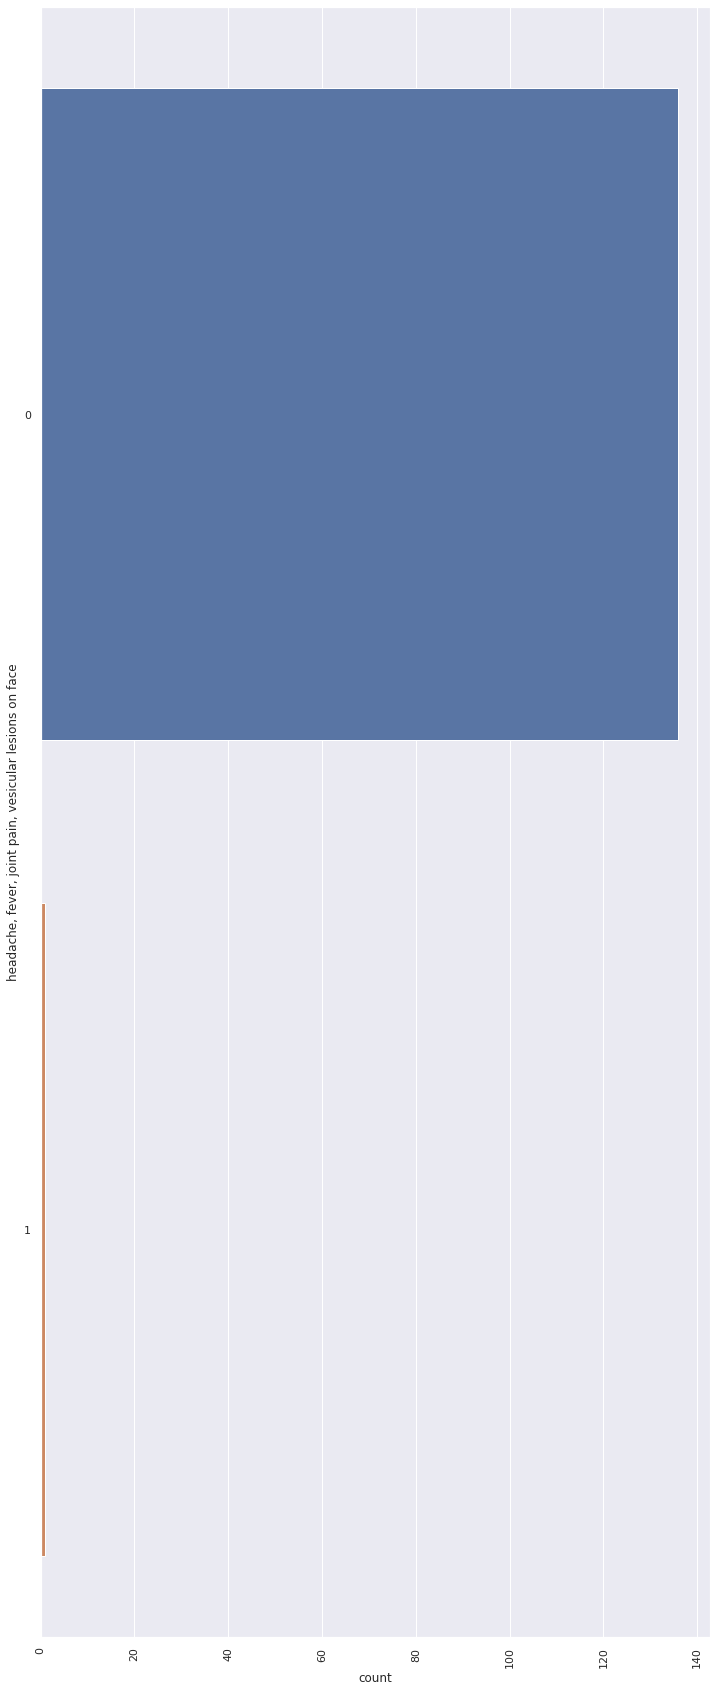

In [ ]:
# the data is balanced for classification training. lets see value counts and also visualize them
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="headache, fever, joint pain, vesicular lesions on face", data=X_train)
print(X_train["headache, fever, joint pain, vesicular lesions on face"].value_counts())

In [ ]:
X.iloc[:, 0:106]

,"Fatigue, headache, fever","Fatigue, sore throat, skin manifestations","Fever, chills, fatigue, headache, skin lesions","Fever, skin rashes","Fever, vesicular lesions",Genital rashes,"Headache, mild fever, chilling, sore throat, skin rash, lesions",Lesions,"Malaise, headache, ulcers, loss of appetite","Pain urinating, fever, rash and blisters",...,"skin lesions, headaches, enlarged lymph nodes, fever","skin lesions, spots on skin, severe anemia","skin lesions, ulcerative lesions",skin manifestations,skin rashes,"skin rashes, dysphagia, muscle pain, fever, decreased physical strength, enlarged lymph nodes","swelling of lymph nodes, isolated skin lesions",symptoms compatible with monkeypox,ulcerative lesions,vesicular rash
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


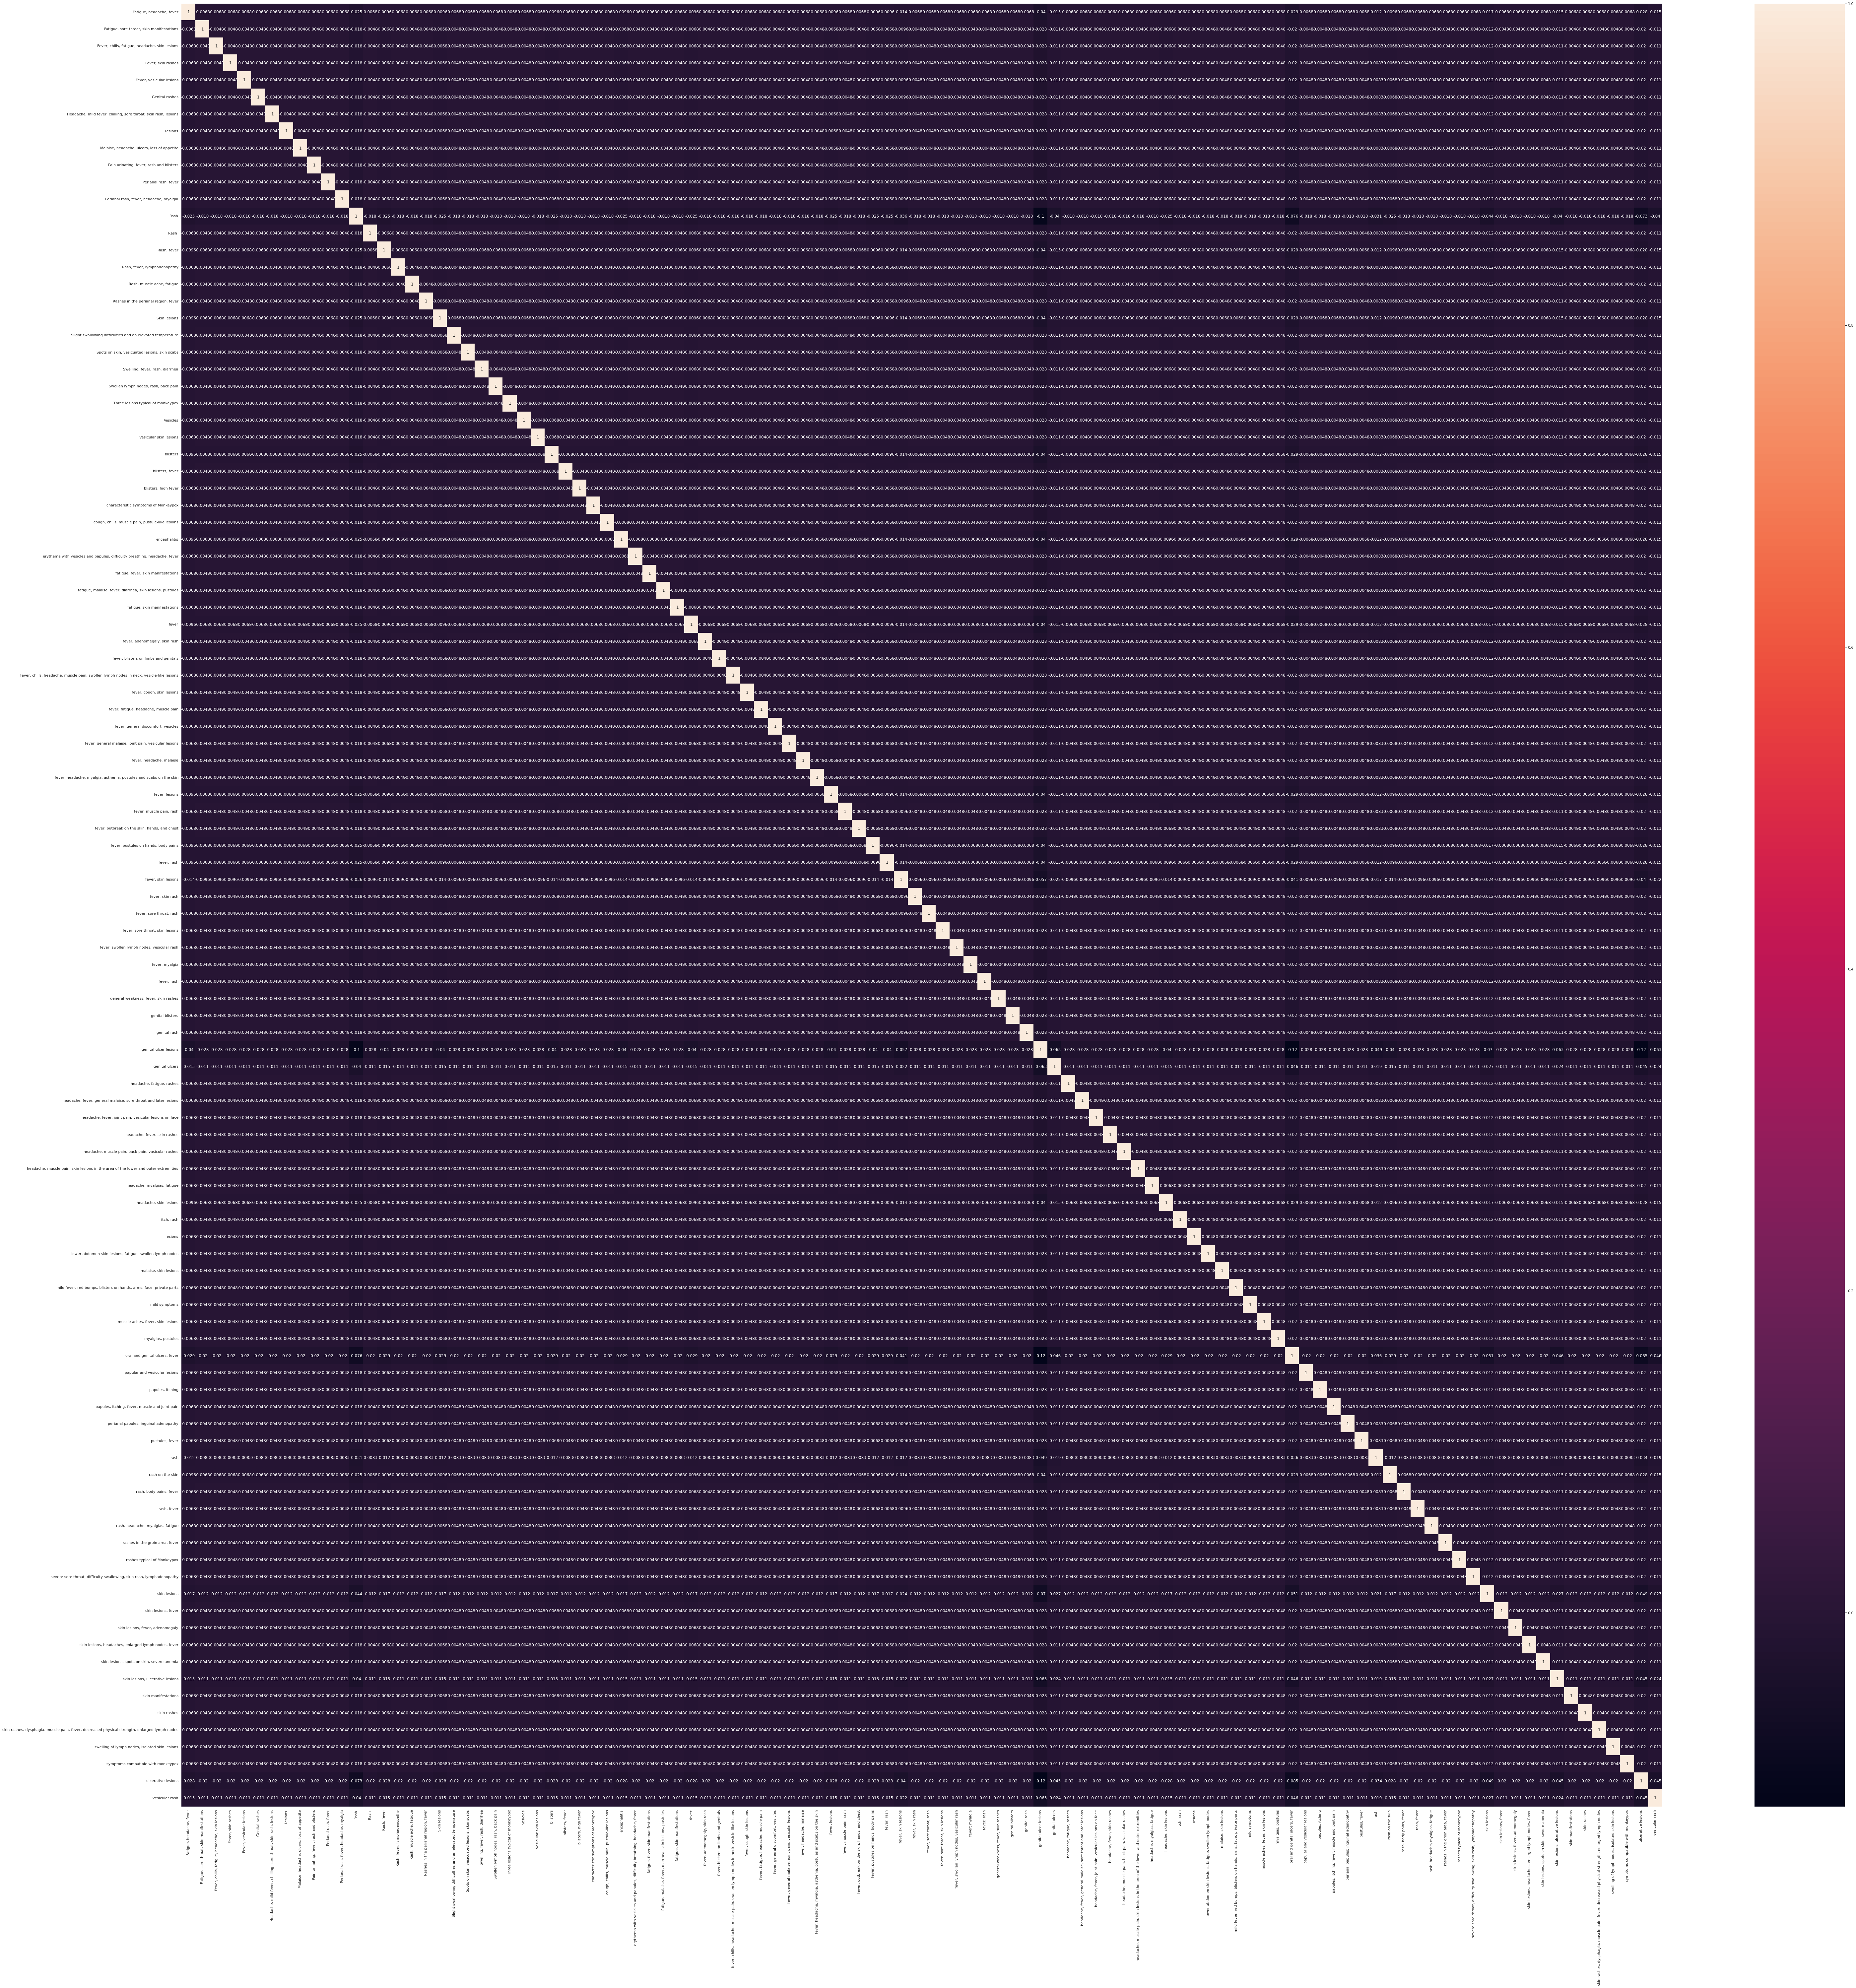

In [ ]:
# linear relationships between some of features using correlation heatmap: for example which symptoms occur together?
df_corr = X.iloc[:, 0:106]
plt.figure(figsize = (100, 100))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

as we look at from correlation map, we can infer these: 


``Rash'', ``Slight swallowing difficulties and an elevated temperature'', ``Three lesions typical of monkeypox'', `` Vesicular skin lesions'', ``blisters, high fever'', ``characteristic symptoms of Monkeypox'', ``cough, chills, muscle pain, pustule-like lesions'', ``erythema with vesicles and papules, difficulty breathing, headache,fever'' have a high correlation coefficent which means these features usually seem together (maybe a Mpox problem)

# Disease Prediction from Symptoms Using Different Classifier

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

# check the shape of X_train and X_test

X_train.shape, X_test.shape

((137, 106), (74, 106))

KNN

In [ ]:
# Modelling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)  
#x_train, y_train = train_df.loc[:,train_df.columns != "prognosis"], train_df.loc[:,"prognosis"]
#x_test, y_test = test_df.loc[:,train_df.columns != "prognosis"], test_df.loc[:,"prognosis"]
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print("Prediction list: {}".format(prediction[0:20]))
print("With KNN (K=5) accuracy is: ",knn.score(X_test, y_test))

Prediction list: [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
With KNN (K=5) accuracy is:  0.8918918918918919


In [ ]:
neighbors = np.arange(1,25)   # for k tuning
train_accuracy = []
test_accuracy = []
# Loop for different k values
for i, k in enumerate(neighbors):
    # k from 1 to 25 (excluded)
    knn = KNeighborsClassifier(n_neighbors = k)
    # fit the knn
    knn.fit(X_train, y_train)
    # train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

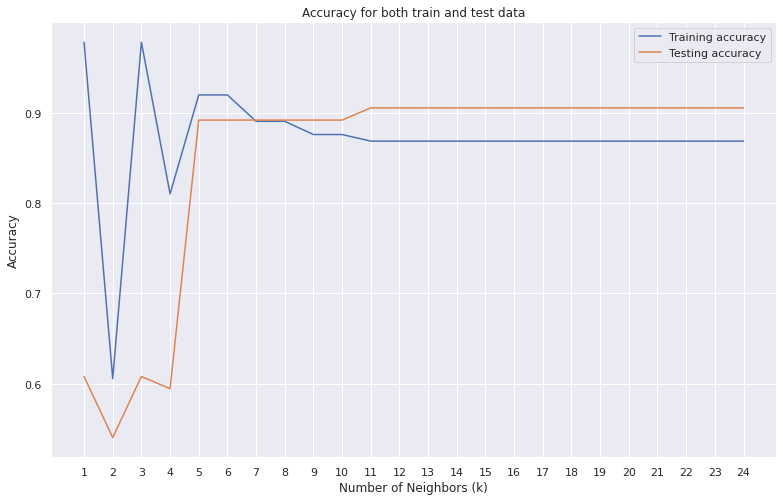

In [ ]:
# Plot the accuracies
plt.figure(figsize = (13,8))
plt.plot(neighbors, train_accuracy, label = "Training accuracy")
plt.plot(neighbors, test_accuracy, label = "Testing accuracy")
plt.legend()
plt.title("Accuracy for both train and test data")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.show()

In [ ]:
# Modelling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =6)  
#x_train, y_train = train_df.loc[:,train_df.columns != "prognosis"], train_df.loc[:,"prognosis"]
#x_test, y_test = test_df.loc[:,train_df.columns != "prognosis"], test_df.loc[:,"prognosis"]
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print("Prediction list: {}".format(prediction[0:20]))
print("With KNN (K=4) accuracy is: ",knn.score(X_test, y_test))

Prediction list: [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
With KNN (K=4) accuracy is:  0.8918918918918919


# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
k = 6 # for K-fold cross validation
cv_result = cross_val_score(knn, X_train, y_train, cv = k) # uses R^2 score
print("CV scores: ", cv_result)
print("CV scores average: ", np.sum(cv_result)/len(cv_result))

CV scores:  [0.86956522 0.86956522 0.86956522 0.82608696 0.86956522 0.86363636]
CV scores average:  0.8613306982872201


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
dt.predict(X_test)
dt.score(X_test, y_test)

0.8918918918918919

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42, n_estimators = 100)
rfc.fit(X_train, y_train)
rfc.predict(X_test)
rfc.score(X_test, y_test)

0.8918918918918919

# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma = "auto", kernel = "rbf" )
svc.fit(X_train, y_train)
svc.predict(X_test)
svc.score(X_test, y_test)

0.9054054054054054

# Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)
logreg.predict(X_test)
logreg.score(X_test, y_test)

0.9054054054054054

# Metrics

In [ ]:
y_predictions = {"KNN": knn.predict(X_test),
          "SVC": svc.predict(X_test),
          "DT": dt.predict(X_test),
          "RFC": rfc.predict(X_test),
          "LOGREG": logreg.predict(X_test)}

from sklearn.metrics import classification_report, confusion_matrix

for classifier, y_pred in y_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    print(classifier,'Confusion matrix: \n',cm)
    print("------------------")
    print(classifier, 'Classification report: \n',classification_report(y_test,y_pred))

KNN Confusion matrix: 
 [[ 0  7]
 [ 1 66]]
------------------
KNN Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.90      0.99      0.94        67

    accuracy                           0.89        74
   macro avg       0.45      0.49      0.47        74
weighted avg       0.82      0.89      0.85        74

SVC Confusion matrix: 
 [[ 0  7]
 [ 0 67]]
------------------
SVC Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.91      1.00      0.95        67

    accuracy                           0.91        74
   macro avg       0.45      0.50      0.48        74
weighted avg       0.82      0.91      0.86        74

DT Confusion matrix: 
 [[ 2  5]
 [ 3 64]]
------------------
DT Classification report: 
               precision    recall  f1-score   support

           0       0

As we can see classification reports for each classifer, knn,svm and logistic regression's success score is 92% while decision tree and random forest's accuracies are approximately 98%.

# Time series Analysis only on the Reported Infected, Recovered, and Death Cases

In [103]:
#load the data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/monkey pox data analysis/monkeypox_df.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,14,16,18,21,24,25,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [104]:
# considering only the confirmed Monkeypox individuals 
df=df[df['Status']=='confirmed']
df=df.loc[~df.Date_confirmation.isna()]  # this is defined by row :, column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58641 entries, 0 to 62543
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       58641 non-null  object 
 1   Status                   58641 non-null  object 
 2   Location                 46034 non-null  object 
 3   City                     1191 non-null   object 
 4   Country                  58641 non-null  object 
 5   Country_ISO3             58641 non-null  object 
 6   Age                      2775 non-null   object 
 7   Gender                   2292 non-null   object 
 8   Date_onset               68 non-null     object 
 9   Date_confirmation        58641 non-null  object 
 10  Symptoms                 186 non-null    object 
 11  Hospitalised (Y/N/NA)    288 non-null    object 
 12  Date_hospitalisation     29 non-null     object 
 13  Isolated (Y/N/NA)        396 non-null    object 
 14  Date_isolation        

# Data enginnering on the Outcome to make into Recovered and Death Features

In [105]:
# Replace nan values in the 'Outcome' column by 'Recovered' as allmost 95-99 % people recovered from Monkeypox
df['Outcome']=df['Outcome'].fillna('Recovered')
df_recovered_death=pd.get_dummies(df['Outcome'])
df_Recovered_Death=df_recovered_death.to_numpy()
# create new features for Death and Recovered individuals
df['Death']=df_Recovered_Death[:,0]
df['Recovered']=df_Recovered_Death[:,1]
df.Outcome.unique()

array(['Recovered', 'Death'], dtype=object)

In [106]:
np.sum(df['Outcome']=='Death') # Total death is 20 individuals on the old feature, 'Outcome' 
np.sum(df['Death']) # Total death is 20 individuals on the new feature

20

In [107]:
# counting the total confirmed or reported infected individuals on the partucular day 
df=df.sort_values(by='Date_confirmation',ascending=True).reset_index(drop=True)
df['date'] = df['Date_confirmation']
df['day_total_infected_indv'] = 1 # initialize
#df['w_value'] = 1
# calculate number of infected on a particular date
df['date'] = pd.to_datetime(df['date'])
df['day_total_infected_indv'] = df.groupby(df['date'].dt.date)['day_total_infected_indv'].transform('sum')
print(df.shape)
#df.head(5)

(58641, 40)


In [108]:
# counting the total confirmed or reported Recovery on the partucular day 
#df=df.sort_values(by='Date_confirmation',ascending=True).reset_index(drop=True)
#df['date'] = df['Date_confirmation']
df['day_total_Recovered_indv'] = df['Recovered'] # initialize
# calculate number of Recovered on a particular date
df['date'] = pd.to_datetime(df['date'])
df['day_total_Recovered_indv'] = df.groupby(df['date'].dt.date)['day_total_Recovered_indv'].transform('sum')
print(df.shape)
#df.head(5)

(58641, 41)


In [109]:
# counting the total confirmed or reported Deaths on the partucular day 
df['day_total_Death_indv'] = df['Death'] # initialize
# calculate number of Recovered on a particular date
df['date'] = pd.to_datetime(df['date'])
df['day_total_Death_indv'] = df.groupby(df['date'].dt.date)['day_total_Death_indv'].transform('sum')
print(df.shape)
#df.head(5)

(58641, 42)


In [110]:
dfc=df.sort_values(by='Date_confirmation',ascending=True).reset_index(drop=True)
df=dfc

# The plot of Infected, Recovery, and Death Individuals for time series 

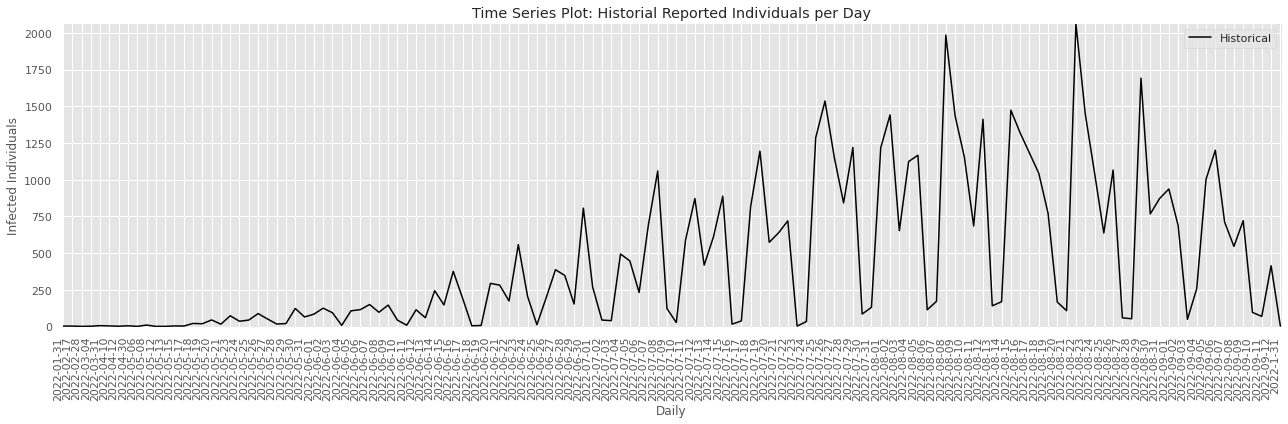

In [111]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18, 6))
#ax.plot(df['Date_confirmation'], df['d_value'], color='black', label='Historical')
plt.plot(df['Date_confirmation'], df['day_total_infected_indv'], color='black', label='Historical')
ax.legend(loc='best')
ax.set(title='Time Series Plot: Historial Reported Individuals per Day', xlabel='Daily', ylabel='Infected Individuals')
ax.margins(0.001, tight=True)  # or set the margins to be small and tight
fig.autofmt_xdate(rotation=90)
fig.tight_layout()

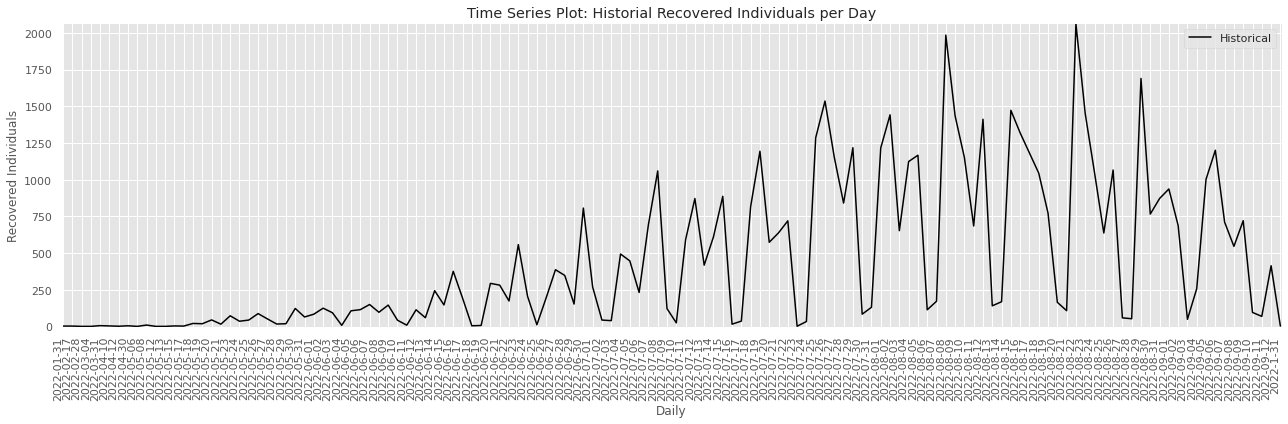

In [112]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18, 6))
#ax.plot(df['Date_confirmation'], df['d_value'], color='black', label='Historical')
plt.plot(df['Date_confirmation'], df['day_total_Recovered_indv'], color='black', label='Historical')
ax.legend(loc='best')
ax.set(title='Time Series Plot: Historial Recovered Individuals per Day', xlabel='Daily', ylabel='Recovered Individuals')
ax.margins(0.001, tight=True)  # or set the margins to be small and tight
fig.autofmt_xdate(rotation=90)
fig.tight_layout()

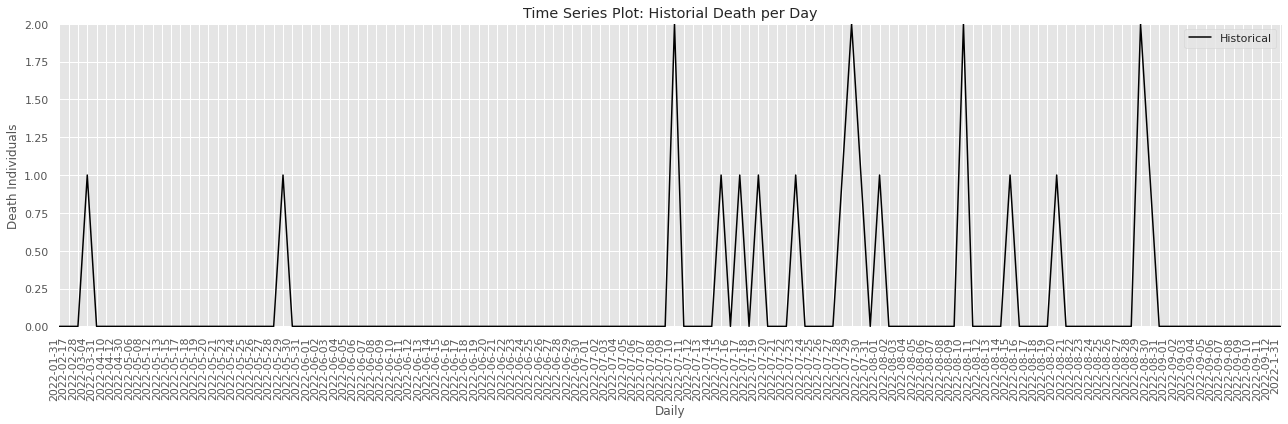

In [113]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18, 6))
#ax.plot(df['Date_confirmation'], df['d_value'], color='black', label='Historical')
plt.plot(df['Date_confirmation'], df['day_total_Death_indv'], color='black', label='Historical')
ax.legend(loc='best')
ax.set(title='Time Series Plot: Historial Death per Day', xlabel='Daily', ylabel='Death Individuals')
ax.margins(0.001, tight=True)  # or set the margins to be small and tight
fig.autofmt_xdate(rotation=90)
fig.tight_layout()

In [114]:
#this will delete the duplicate value 
df.drop_duplicates('date',inplace=True)
df.head(5)

,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source_VII,Date_entry,Date_death,Date_last_modified,Death,Recovered,date,day_total_infected_indv,day_total_Recovered_indv,day_total_Death_indv
0,E2,confirmed,Imo,NaN,Nigeria,NGA,NaN,NaN,NaN,2022-01-31,...,NaN,2022-07-19,NaN,2022-07-19,0,1,2022-01-31,3,3.0,0
2,E470,confirmed,Ayos,NaN,Cameroon,CMR,0-39,NaN,NaN,2022-02-17,...,NaN,2022-06-06,NaN,2022-07-20,0,1,2022-02-17,3,3.0,0
5,E8,confirmed,Lagos,NaN,Nigeria,NGA,NaN,NaN,NaN,2022-02-28,...,NaN,2022-07-19,NaN,2022-07-19,0,1,2022-02-28,1,1.0,0
6,E158,confirmed,Mbaiki District,NaN,Central African Republic,CAF,NaN,NaN,NaN,2022-03-04,...,NaN,2022-06-01,2022-03-04,2022-07-21,1,0,2022-03-04,2,1.0,1
8,E135,confirmed,Delta,NaN,Nigeria,NGA,NaN,NaN,NaN,2022-03-31,...,NaN,2022-06-01,NaN,2022-07-19,0,1,2022-03-31,6,6.0,0


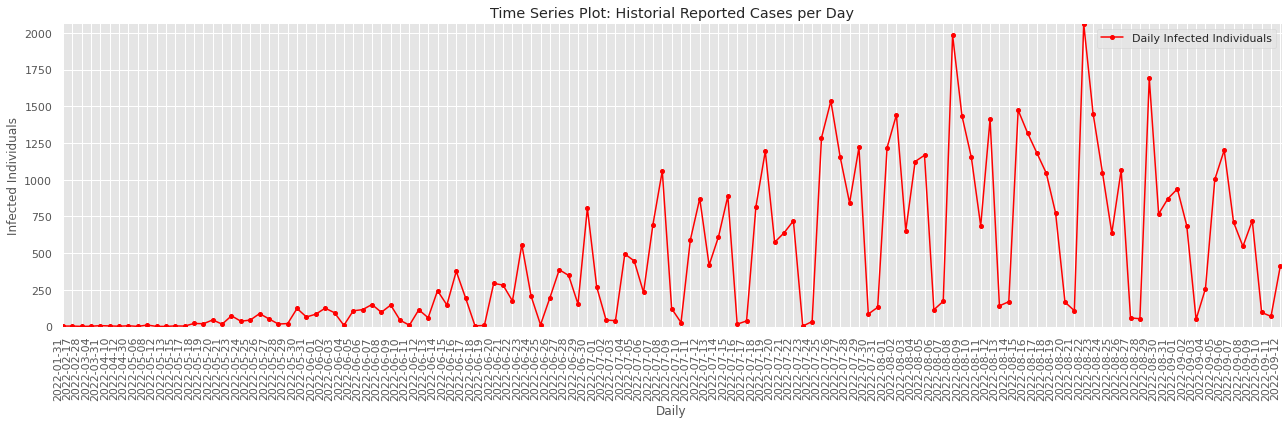

In [115]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(df['Date_confirmation'], df['day_total_infected_indv'], 
                 marker="o",
                 linestyle="-",
                 markersize=4,
                 label="Daily Infected Individuals",
                 color = "red")
ax.legend(loc='best')
ax.set(title='Time Series Plot: Historial Reported Cases per Day', xlabel='Daily', ylabel='Infected Individuals')
ax.margins(0.001, tight=True)  # or set the margins to be small and tight
fig.autofmt_xdate(rotation=90)
fig.tight_layout()

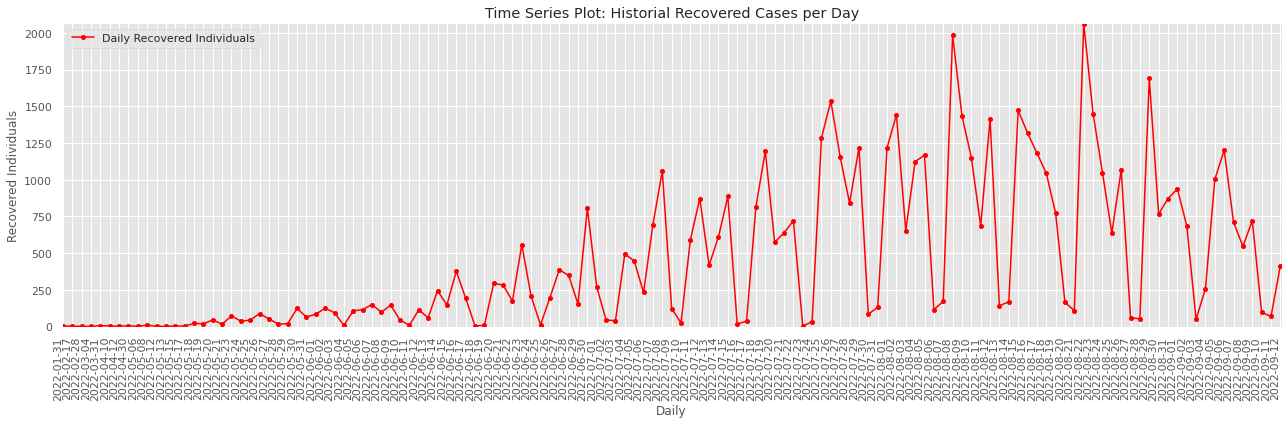

In [116]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18, 6))
#ax.plot(df['Date_confirmation'], df['d_value'], color='black', label='Historical')
plt.plot(df['Date_confirmation'], df['day_total_Recovered_indv'],                  
                 marker="o",
                 linestyle="-",
                 markersize=4,
                 label="Daily Recovered Individuals",
                 color = "red")
ax.legend(loc='best')
ax.set(title='Time Series Plot: Historial Recovered Cases per Day', xlabel='Daily', ylabel='Recovered Individuals')
ax.margins(0.001, tight=True)  # or set the margins to be small and tight
fig.autofmt_xdate(rotation=90)
fig.tight_layout()

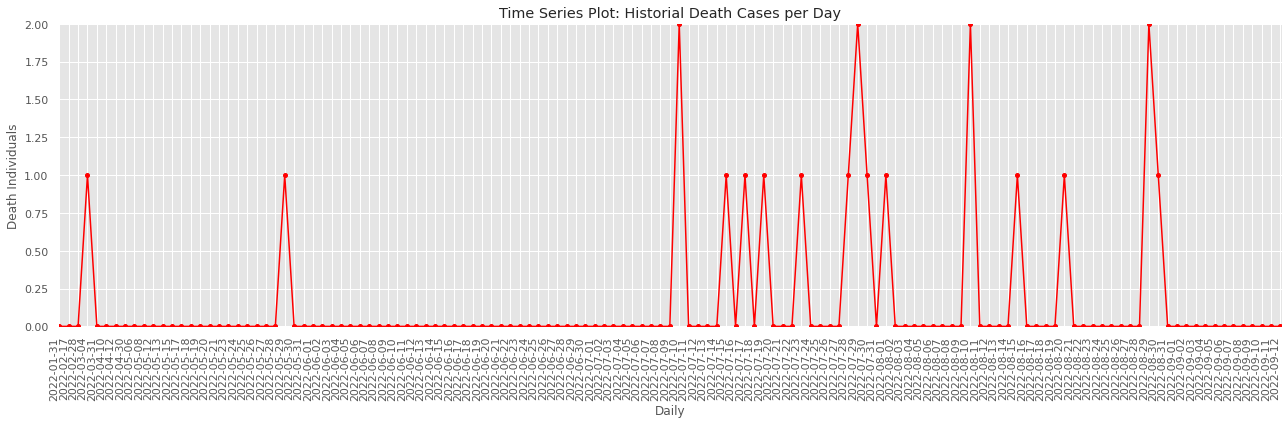

In [117]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18, 6))
#ax.plot(df['Date_confirmation'], df['d_value'], color='black', label='Historical')
plt.plot(df['Date_confirmation'], df['day_total_Death_indv'],  marker="o",
                 linestyle="-",
                 markersize=4,
                 label="Daily Death Individuals",
                 color = "red")
ax.set(title='Time Series Plot: Historial Death Cases per Day', xlabel='Daily', ylabel='Death Individuals')
ax.margins(0.001, tight=True)  # or set the margins to be small and tight
fig.autofmt_xdate(rotation=90)
fig.tight_layout()

In [118]:
df['Week_Number'] = df['date'].dt.isocalendar().week
df.head(5)

,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Date_entry,Date_death,Date_last_modified,Death,Recovered,date,day_total_infected_indv,day_total_Recovered_indv,day_total_Death_indv,Week_Number
0,E2,confirmed,Imo,NaN,Nigeria,NGA,NaN,NaN,NaN,2022-01-31,...,2022-07-19,NaN,2022-07-19,0,1,2022-01-31,3,3.0,0,5
2,E470,confirmed,Ayos,NaN,Cameroon,CMR,0-39,NaN,NaN,2022-02-17,...,2022-06-06,NaN,2022-07-20,0,1,2022-02-17,3,3.0,0,7
5,E8,confirmed,Lagos,NaN,Nigeria,NGA,NaN,NaN,NaN,2022-02-28,...,2022-07-19,NaN,2022-07-19,0,1,2022-02-28,1,1.0,0,9
6,E158,confirmed,Mbaiki District,NaN,Central African Republic,CAF,NaN,NaN,NaN,2022-03-04,...,2022-06-01,2022-03-04,2022-07-21,1,0,2022-03-04,2,1.0,1,9
8,E135,confirmed,Delta,NaN,Nigeria,NGA,NaN,NaN,NaN,2022-03-31,...,2022-06-01,NaN,2022-07-19,0,1,2022-03-31,6,6.0,0,13


In [119]:
#convert date column to datetime and subtract one week
df['date'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')
#df['Week_Number'] = df['date'].dt.isocalendar().week
#calculate sum of values, grouped by week
df_weekly=df.groupby([pd.Grouper(key='date', freq='W')])['day_total_infected_indv'].sum()
weekly_total_ind =np.zeros((33,1))
for i in range(33):
  weekly_total_ind[i]=df_weekly[i]
df_weekly_infected=df_weekly.to_numpy()
df_weekly
date=df['date']

In [120]:
#convert date column to datetime and subtract one week
df['date'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')
#df['Week_Number'] = df['date'].dt.isocalendar().week
#calculate sum of values, grouped by week
df_new=df.groupby([pd.Grouper(key='date', freq='W')])['day_total_infected_indv'].sum()
weekly_total_ind =np.zeros((33,1))
for i in range(33):
  weekly_total_ind[i]=df_weekly[i]
df_weekly_infected=df_weekly.to_numpy()
df_weekly

date
2022-01-30       3
2022-02-06       0
2022-02-13       3
2022-02-20       0
2022-02-27       3
2022-03-06       0
2022-03-13       0
2022-03-20       0
2022-03-27       6
2022-04-03       4
2022-04-10       2
2022-04-17       0
2022-04-24       5
2022-05-01      11
2022-05-08       6
2022-05-15     104
2022-05-22     330
2022-05-29     606
2022-06-05     674
2022-06-12    1033
2022-06-19    1721
2022-06-26    2048
2022-07-03    3076
2022-07-10    3434
2022-07-17    3981
2022-07-24    6253
2022-07-31    5890
2022-08-07    6980
2022-08-14    6066
2022-08-21    6378
2022-08-28    5263
2022-09-04    4347
2022-09-11     414
Freq: W-SUN, Name: day_total_infected_indv, dtype: int64

In [121]:
# Redefine the data that is gonna be use later in the time series training test split data
week_new_data=df_weekly
weekly_new_date=df['date']

# Here’s how to interpret the output:
1. There were 3 total infected individuals during the week starting the the day after 2022/01/23, i.e. Monday.  
1. There were 3 total infected individuals during the week starting the the day after 2022/01/30 i.e. Monday.  



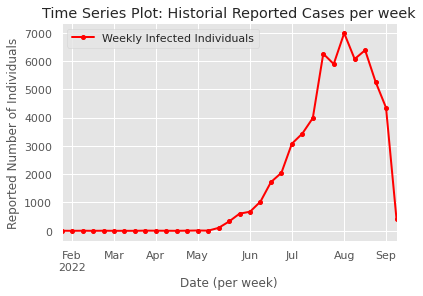

In [122]:
plt.style.use('ggplot')
df_weekly.plot(linewidth=2,
                 grid = True,
                 marker="o",
                 linestyle="-",
                 markersize=4,
                 label="Weekly Infected Individuals",
                 color = "red") # steelblue
plt.xlabel("Date (per week)")
plt.ylabel("Reported Number of Individuals")
plt.title('Time Series Plot: Historial Reported Cases per week')
plt.legend()
plt.show()

# Time Series

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

In [123]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns 

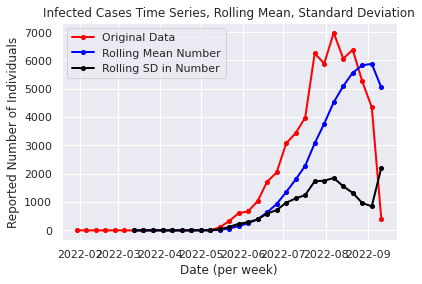

In [150]:
rolling_mean = df_weekly.rolling(7).mean()
rolling_std = df_weekly.rolling(7).std()

plt.plot(df_weekly, color="red",linewidth=2, marker="o", linestyle="-", markersize=4,label="Original Data")
plt.plot(rolling_mean, color="blue",linewidth=2, marker="o", linestyle="-", markersize=4, label="Rolling Mean Number")
plt.plot(rolling_std, color="black",linewidth=2, marker="o", linestyle="-", markersize=4, label = "Rolling SD in Number")
plt.title("Infected Cases Time Series, Rolling Mean, Standard Deviation")
plt.xlabel("Date (per week)")
plt.ylabel("Reported Number of Individuals")
plt.legend(loc="best")

In [125]:
from statsmodels.tsa.stattools import adfuller

In [126]:
adft = adfuller(df_weekly,autolag="AIC")

In [127]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

      Values                       Metric
0  -1.368775              Test Statistics
1   0.597151                      p-value
2   9.000000             No. of lags used
3  23.000000  Number of observations used
4  -3.752928          critical value (1%)
5  -2.998500          critical value (5%)
6  -2.638967         critical value (10%)


We can see that our data is not stationary from the fact that our p-value is greater than 5 percent and the test statistic is greater than the critical value. We can also draw these conclusions from inspecting the data, as we see a clear, increasing trend in the number of infected individuals in the weekly data.

The Pandas data frame has an autocorrelation method that we can use to calculate the autocorrelation in our infected cases data. Let’s do this for a one-week lag:

In [128]:
autocorrelation_lag1 = df_weekly.autocorr(lag=1)
print("One week Lag: ", autocorrelation_lag1)

One week Lag:  0.9267251860924517


Now, let’s try three, six and nine weeks:

In [152]:
autocorrelation_lag3 = df_weekly.autocorr(lag=3)
print("Three weeks Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df_weekly.autocorr(lag=6)
print("Six weeks Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df_weekly.autocorr(lag=9)
print("Nine weeks Lag: ", autocorrelation_lag9)

Three weeks Lag:  0.7726079513307096
Six weeks Lag:  0.5338745855056541
Nine weeks Lag:  0.36751714088064735


We see that, even with a nine-week lag, the data is highly autocorrelated. This is further illustration of the short- and long-term trends in the data.

# Decomposition

To proceed, let’s import seasonal_decompose from the statsmodels package:

In [130]:
from statsmodels.tsa.seasonal import seasonal_decompose

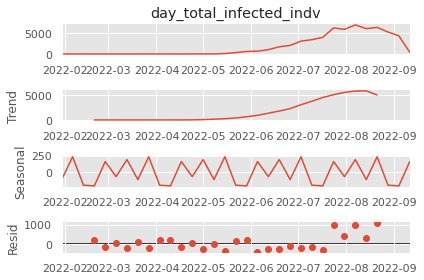

In [131]:
decompose = seasonal_decompose(df_weekly,model='additive', period=7)
decompose.plot()
plt.show()

# Conclusion: 
From this plot, we can clearly see the increasing trend in number of infected cases until August , then started going down, resulting the seasonality patterns in the rise and fall in values each month.

# Forecasting
Time series forecasting predicts future values in a time series based on current and historical data. We will forecast the number of passengers using the ARIMA method, which allows us to forecast future values as a linear combination of past values. We will use the auto arima package to avoid the time-consuming process of tuning hyperparameters.First, divide our data into training and testing segments and visualize the results:

In [144]:
X_test_date=weekly_date[30:35]
X_test_date

967    2022-05-21
975    2022-05-22
1082   2022-05-23
1197   2022-05-24
1347   2022-05-25
Name: date, dtype: datetime64[ns]

In [145]:
# Train test split
week_data=week_new_data
weekly_date=weekly_new_date
#train data
X_train_date=weekly_date[0:31]
y_train_week_report=week_data[0:31]
#test
X_test_date=weekly_date[30:35]
y_test_week_report=week_data[30:35]


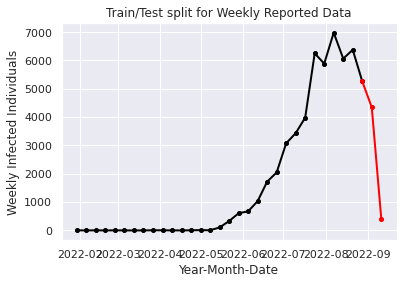

In [146]:
#import matplotlib.pyplot as plt
#import seaborn as sns 
plt.plot(y_train_week_report,linewidth=2, marker="o", linestyle="-", markersize=4, color = "black")
plt.plot(y_test_week_report, linewidth=2, marker="o", linestyle="-", markersize=4,color = "red")
plt.title("Train/Test split for Weekly Reported Data")
plt.ylabel("Weekly Infected Individuals")
plt.xlabel('Year-Month-Date')
sns.set()
plt.show()

The black line corresponds to our training data and the red line corresponds to our test data.

Let’s import auto_arima from the pdmarima package, train our model and generate predictions:

In [147]:
from pmdarima.arima import auto_arima

In [148]:
model = auto_arima(y_train_week_report, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train_week_report)
forecast = model.predict(n_periods=len(y_test_week_report))
forecast = pd.DataFrame(forecast,index = y_test_week_report.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=465.682, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=470.854, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=472.324, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=472.618, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=471.483, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=465.305, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=463.479, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=465.478, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=470.556, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=467.377, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=463.059, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=473.482, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=465.057, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=465.059, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=473.1

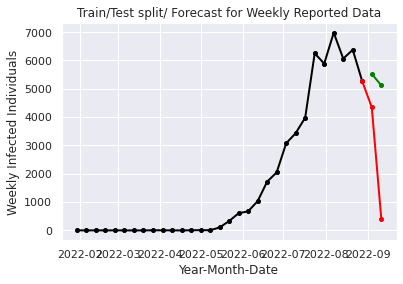

In [151]:
plt.plot(y_train_week_report,linewidth=2, marker="o", linestyle="-", markersize=4, color = "black")
plt.plot(y_test_week_report, linewidth=2, marker="o", linestyle="-", markersize=4,color = "red")
plt.plot(forecast, linewidth=2, marker="o", linestyle="-", markersize=4,color = "green")
plt.title("Train/Test split/ Forecast for Weekly Reported Data")
plt.ylabel("Weekly Infected Individuals")
plt.xlabel('Year-Month-Date')
sns.set()
plt.show()

In [141]:
forecast

,Prediction
date,
2022-08-28,NaN
2022-09-04,5526.524851
2022-09-11,5120.021155


In [ ]:
!pip3 install arch yfinance pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 907 kB 9.5 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
#Install Pyramid ARIMA
##In google colab we should install pmdarima in order to use it.
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

Finally, let’s calculate root mean squared error (RMSE):

# References:

https://builtin.com/data-science/time-series-python

# LSTM Time Series

# Prepare Data

In [ ]:
#load the data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/monkey pox data analysis/monkeypox_df.csv')
# delete the row when the Status is nan
df=df.loc[~df.Status.isna()]
#'Status' change to category dtype
df['Status'] = df['Status'].astype("category")
# display the dataframe
# remove category value 'omit_error' from "Status" column
df['Status'] = df['Status'].cat.remove_categories('omit_error')
# Remobe the 'na' value from the 'Status'
df=df.loc[~df.Status.isna()] 
# considering only the confirmed Monkeypox individuals 
df=df[df['Status']=='confirmed']
df=df.loc[~df.Date_confirmation.isna()]  # this is defined by row :, column
df.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (12,14,16,18,21,24,25,29) have mixed types.Specify dtype option on import or set low_memory=False.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 58641 entries, 0 to 62543
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       58641 non-null  object  
 1   Status                   58641 non-null  category
 2   Location                 46034 non-null  object  
 3   City                     1191 non-null   object  
 4   Country                  58641 non-null  object  
 5   Country_ISO3             58641 non-null  object  
 6   Age                      2775 non-null   object  
 7   Gender                   2292 non-null   object  
 8   Date_onset               68 non-null     object  
 9   Date_confirmation        58641 non-null  object  
 10  Symptoms                 186 non-null    object  
 11  Hospitalised (Y/N/NA)    288 non-null    object  
 12  Date_hospitalisation     29 non-null     object  
 13  Isolated (Y/N/NA)        396 non-null    object  
 14  Date_i

In [ ]:
# counting the total confirmed or reported infected individuals on the partucular day 
df=df.sort_values(by='Date_confirmation',ascending=True).reset_index(drop=True)
df['date'] = df['Date_confirmation']
df['day_total_infected_indv'] = 1 # initialize
#df['w_value'] = 1
# calculate number of infected on a particular date
df['date'] = pd.to_datetime(df['date'])
df['day_total_infected_indv'] = df.groupby(df['date'].dt.date)['day_total_infected_indv'].transform('sum')
print(df.shape)
#df.head(5)

(58641, 38)


In [ ]:
#this will delete the duplicate value 
df.drop_duplicates('date',inplace=True)
#convert date column to datetime and subtract one week
df['date'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')
df['Week_Number'] = df['date'].dt.isocalendar().week
#calculate sum of values, grouped by week
df_weekly=df.groupby([pd.Grouper(key='date', freq='W')])['day_total_infected_indv'].sum()
#weekly_total_ind =np.zeros((33,1))
df_weekly_infected=df_weekly.to_numpy()
time_series_df=df_weekly.reset_index()
time_series_df

,date,day_total_infected_indv
0,2022-01-30,3
1,2022-02-06,0
2,2022-02-13,3
3,2022-02-20,0
4,2022-02-27,3
5,2022-03-06,0
6,2022-03-13,0
7,2022-03-20,0
8,2022-03-27,6
9,2022-04-03,4


In [ ]:
time_series_df.to_csv('/content/drive/MyDrive/Colab Notebooks/CS_Project_MonkeyPox/Haridas_das_monkey pox data analysis/time_series_df.csv')

In [ ]:
data=time_series_df['day_total_infected_indv'].to_numpy()
data

array([   3,    0,    3,    0,    3,    0,    0,    0,    6,    4,    2,
          0,    5,   11,    6,  104,  330,  606,  674, 1033, 1721, 2048,
       3076, 3434, 3981, 6253, 5890, 6980, 6066, 6378, 5263, 4347,  414])

# Data Preprocessing

In [ ]:
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# choose a number of time steps
n_steps = 1
# split into samples
X, y = split_sequence(data, n_steps)
# summarize the data
for i in range(len(X)):
  print(X[i], y[i])

[3] 0
[0] 3
[3] 0
[0] 3
[3] 0
[0] 0
[0] 0
[0] 6
[6] 4
[4] 2
[2] 0
[0] 5
[5] 11
[11] 6
[6] 104
[104] 330
[330] 606
[606] 674
[674] 1033
[1033] 1721
[1721] 2048
[2048] 3076
[3076] 3434
[3434] 3981
[3981] 6253
[6253] 5890
[5890] 6980
[6980] 6066
[6066] 6378
[6378] 5263
[5263] 4347
[4347] 414


In [ ]:
X[0:4]

array([[3],
       [0],
       [3],
       [0]])

# LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
X_train=X[0:27]
X_test=X[27:32]
y_train=y[0:27]
y_test=y[27:32]
model = Sequential()
model.add(LSTM(120, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=200, verbose=0)
# demonstrate prediction

In [ ]:
X[29]

array([[6378]])

In [ ]:
X_test = X_test.reshape((5, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
print(yhat)

[[8142.844 ]
 [7076.733 ]
 [7440.657 ]
 [6140.0938]
 [5071.649 ]]


In [ ]:
time_series_df['day_total_infected_indv']

0        3
1        0
2        3
3        0
4        3
5        0
6        0
7        0
8        6
9        4
10       2
11       0
12       5
13      11
14       6
15     104
16     330
17     606
18     674
19    1033
20    1721
21    2048
22    3076
23    3434
24    3981
25    6253
26    5890
27    6980
28    6066
29    6378
30    5263
31    4347
32     414
Name: day_total_infected_indv, dtype: int64

In [ ]:
x_train=time_series_df['date'].to_numpy()

In [ ]:
y_train=time_series_df['day_total_infected_indv'].to_numpy()


In [ ]:
x_train

array(['2022-01-30T00:00:00.000000000', '2022-02-06T00:00:00.000000000',
       '2022-02-13T00:00:00.000000000', '2022-02-20T00:00:00.000000000',
       '2022-02-27T00:00:00.000000000', '2022-03-06T00:00:00.000000000',
       '2022-03-13T00:00:00.000000000', '2022-03-20T00:00:00.000000000',
       '2022-03-27T00:00:00.000000000', '2022-04-03T00:00:00.000000000',
       '2022-04-10T00:00:00.000000000', '2022-04-17T00:00:00.000000000',
       '2022-04-24T00:00:00.000000000', '2022-05-01T00:00:00.000000000',
       '2022-05-08T00:00:00.000000000', '2022-05-15T00:00:00.000000000',
       '2022-05-22T00:00:00.000000000', '2022-05-29T00:00:00.000000000',
       '2022-06-05T00:00:00.000000000', '2022-06-12T00:00:00.000000000',
       '2022-06-19T00:00:00.000000000', '2022-06-26T00:00:00.000000000',
       '2022-07-03T00:00:00.000000000', '2022-07-10T00:00:00.000000000',
       '2022-07-17T00:00:00.000000000', '2022-07-24T00:00:00.000000000',
       '2022-07-31T00:00:00.000000000', '2022-08-07

In [ ]:
x_train.shape[0]

33

https://medium.com/analytics-vidhya/3-time-series-forecasting-using-lstm-e14b93f4ec7c

# Build The LSTM Model

# Install 7zip reader libarchive

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import keras.models
import tensorflow 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
seed = 7

In [ ]:
model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train.shape[0],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next value

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
history = model.fit(x_train, y_train, epochs = 25, batch_size=32, validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 33, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 33, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 33, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 33, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

ValueError: ignored

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_steps = 3
n_features = 1
X=x_train
y=y_train
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(x_train.shape[0], n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

ValueError: ignored

In [ ]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
n_steps = 3
n_features = 1
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
x_input

array([[[70],
        [80],
        [90]]])

In [ ]:
df.drop_duplicates('Week_Number',inplace=True)

In [ ]:
df['Week_Number'] 

0         3
2         5
5         7
8        11
14       12
18       13
20       15
25       16
36       17
42       18
146      19
476      20
1082     21
1756     22
2789     23
4510     24
6558     25
9634     26
13068    27
17049    28
23302    29
29192    30
36172    31
42238    32
48616    33
53879    34
58226    35
Name: Week_Number, dtype: UInt32

In [ ]:
df['Week_Number'].shape 

(27,)

In [ ]:
df_weekly.to_numpy()

array([   3,    0,    3,    0,    3,    0,    0,    0,    6,    4,    2,
          0,    5,   11,    6,  104,  330,  606,  674, 1033, 1721, 2048,
       3076, 3434, 3981, 6253, 5890, 6980, 6066, 6378, 5263, 4347,  414])

In [ ]:
df['Week_Number'].to_numpy()

array([4, 6, 8, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36], dtype=object)

ValueError: ignored

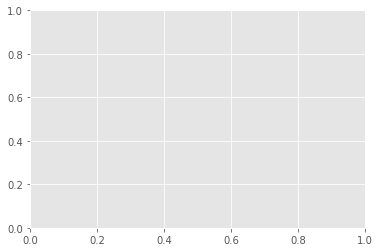

In [ ]:
plt.plot(df['Week_Number'].to_numpy(),df_weekly.to_numpy())

In [ ]:
df_weekly.shape

(33,)

In [ ]:
df_weekly[1]

0

(58641, 42)

# # Country Wise Monkey Pox Data

Infected individuals are reported on the date, so predicting monkeypox from data using time series is expected. Here we analyze the reported case analysis through Spatial.  


In [ ]:
#load the data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/monkey pox data analysis/monkeypox_df.csv')
# delete the row when the Status is nan
df=df.loc[~df.Status.isna()]
#'Status' change to category dtype
df['Status'] = df['Status'].astype("category")
# display the dataframe
# remove category value 'omit_error' from "Status" column
df['Status'] = df['Status'].cat.remove_categories('omit_error')
# Remobe the 'na' value from the 'Status'
df=df.loc[~df.Status.isna()] 
# considering only the confirmed Monkeypox individuals 
df=df[df['Status']=='confirmed']
df=df.loc[~df.Date_confirmation.isna()]  # this is defined by row :, column
df.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,14,16,18,21,24,25,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58641 entries, 0 to 62543
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       58641 non-null  object  
 1   Status                   58641 non-null  category
 2   Location                 46034 non-null  object  
 3   City                     1191 non-null   object  
 4   Country                  58641 non-null  object  
 5   Country_ISO3             58641 non-null  object  
 6   Age                      2775 non-null   object  
 7   Gender                   2292 non-null   object  
 8   Date_onset               68 non-null     object  
 9   Date_confirmation        58641 non-null  object  
 10  Symptoms                 186 non-null    object  
 11  Hospitalised (Y/N/NA)    288 non-null    object  
 12  Date_hospitalisation     29 non-null     object  
 13  Isolated (Y/N/NA)        396 non-null    object  
 14  Date_i

In [ ]:
df['Country'].unique()

array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Austria', 'Argentina',
       'Denmark', 'Slovenia', 'Scotland', 'Czech Republic',
       'United Arab Emirates', 'Finland', 'Wales', 'Northern Ireland',
       'Malta', 'Ireland', 'Mexico', 'Brazil', 'Hungary', 'Norway',
       'Gibraltar', 'Morocco', 'Latvia', 'Bahamas', 'Ghana', 'Greece',
       'Iceland', 'Poland', 'Venezuela', 'Romania', 'Georgia',
       'Luxembourg', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Peru', 'Benin', 'Estonia', 'Puerto Rico', 'Turkey',
       'Panama', 'Dominican Republic', 'Ecuador', 'Jamaica', 'Slovakia',
       'New Zealand', 'Russia', 'India', 'Bosnia And Herzegovina',
       'Saudi Arabia', 'Martinique', 'Barbados', 'Costa Rica', 'Qatar',
       'Bermuda', 'Japan', 'Guadeloupe',

In [ ]:
len(df['Country'].unique())

107

In [ ]:
def total_reported_cases(df,country):
  df=df[df['Country']==country]
  #this will delete the duplicate value 
  df.drop_duplicates('date',inplace=True)
  #convert date column to datetime and subtract one week
  df['date'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')
  #calculate sum of values, grouped by week
  df_weekly=df.groupby([pd.Grouper(key='date', freq='W')])['day_total_infected_indv'].sum()
  weekly_total_ind =np.zeros((33,1))
  df_weekly_infected=df_weekly.to_numpy()
  country_total_infected=np.sum(df_weekly)
  return country, country_total_infected

In [ ]:
def total_reported_cases(dataframe,country):
  dataframe=dataframe[dataframe['Country']==country]
  country_total_infected=len(dataframe)
  return country, country_total_infected

In [ ]:
len(df['Country'].unique())

107

In [ ]:
dataframe=df
country=dataframe['Country'].unique()
total_reported_country=len(dataframe['Country'].unique())
aDemo = []
lst=[]
df_reported_total_country=np.zeros((total_reported_country,2))
for i in range(len(dataframe['Country'].unique())):
  lst1, lst2=total_reported_cases(df,country[i])
  aDemo.append(lst1)
  lst.append(lst2)
  dataframe=df

In [ ]:
print('The total number of country infected on September 9',len(aDemo))
print('The total number of country infected individuals on September 9',len(lst))
dfc.shape

The total number of country infected on September 9 107
The total number of country infected individuals on September 9 107


(131, 42)

In [ ]:
lst

[3320,
 898,
 6884,
 21835,
 1320,
 168,
 805,
 3776,
 726,
 129,
 3533,
 1195,
 245,
 485,
 286,
 221,
 183,
 45,
 89,
 58,
 16,
 30,
 45,
 30,
 33,
 160,
 788,
 6033,
 71,
 83,
 6,
 3,
 4,
 2,
 76,
 66,
 12,
 145,
 3,
 36,
 2,
 54,
 486,
 31,
 8,
 3,
 16,
 5,
 4,
 1260,
 27,
 5,
 1937,
 3,
 10,
 152,
 11,
 12,
 9,
 59,
 12,
 14,
 5,
 2,
 11,
 3,
 8,
 7,
 1,
 3,
 3,
 1,
 4,
 1,
 4,
 7,
 1,
 4,
 2,
 5,
 2,
 119,
 5,
 5,
 12,
 1,
 2,
 2,
 4,
 3,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 220,
 8,
 3,
 7,
 196,
 2]

In [ ]:
np.sum(lst)

58641

In [ ]:
# Create a Pandas Dataframe from Multiple Lists using zip()
zipped = list(zip(aDemo, lst))
df3 = pd.DataFrame(zipped, columns=['Country', 'Total_infected'])
df3

,Country,Total_infected
0,England,3320
1,Portugal,898
2,Spain,6884
3,United States,21835
4,Canada,1320
...,...,...
102,Central African Republic,8
103,Republic of Congo,3
104,Cameroon,7
105,Democratic Republic Of The Congo,196


In [ ]:
# Demonstrate the map by the location wise
def plot_map(df,col, title): # col stands for column , Title stands for what charecter we want to see, for example, 'Country'
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country", locationmode='country names', 
                  color=col, hover_name="Country", 
                  title=title, hover_data=[col], color_continuous_scale="Plasma")
    fig.show()

In [ ]:
def treemap_plot(col): # col represts column, for example, 'Confirmed_Cases'
    fig = px.treemap(df3, path=["Country"], values=col, height=700,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

In [ ]:
tree_plot=treemap_plot('Total_infected')

In [ ]:
def treemap_plot(col): # col represts column, for example, 'Confirmed_Cases'
    fig = px.treemap(df3, path=["Country"], values=col, height=700,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

In [ ]:
plot_map(df3, 'Total_infected','Country')


https://www.kaggle.com/code/prashantverma13/monkeypox-deep-analysis-eda-and-time-series/data?select=Worldwide_Case_Detection_Timeline.csv